Original Training Sample size : (466, 13)
Training Sample size (with area > 0) : (243, 13)
Test Sample size (with area > 0) : (27, 13)


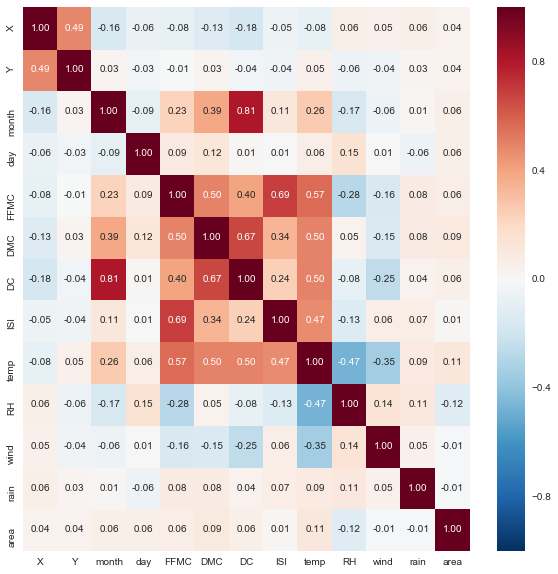

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Import the dataset
dataset = pd.read_csv('train.csv')
full_dataset = dataset.iloc[:, :].values
print('Original Training Sample size : {}'.format(full_dataset.shape))
# get data for which area > 0
new_full_dataset_DF = dataset[dataset.area > 0]
new_full_dataset = new_full_dataset_DF.values
print('Training Sample size (with area > 0) : {}'.format(new_full_dataset.shape))
X = new_full_dataset[:, :-1]
y = new_full_dataset[:, 12]

dataset_test = pd.read_csv('test.csv')
full_test_dataset = dataset_test[dataset_test.area > 0].values
print('Test Sample size (with area > 0) : {}'.format(full_test_dataset.shape))
X_test = full_test_dataset[:, :-1]
y_test = full_test_dataset[:, 12]

# plot the heatmap showing correlation among features
corr = new_full_dataset_DF.corr()
fig = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# NOTE : If a warning comes then just run this cell again, 
# it's known error in the library

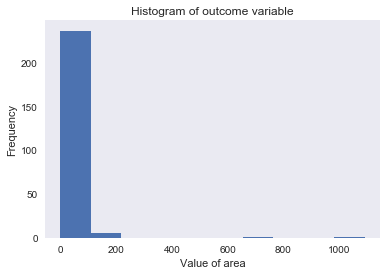

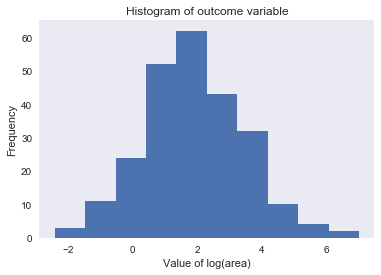

In [3]:
# Plotting the graphs
import matplotlib.pyplot as plt

plt.hist(y, bins=10)
plt.title('Histogram of outcome variable')
plt.xlabel('Value of area')
plt.ylabel('Frequency')
plt.grid()
plt.show()


plt.hist(np.log(y))
plt.title('Histogram of outcome variable')
plt.xlabel('Value of log(area)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [4]:
print('True labels : {}'.format(y))

True labels : [3.60000e-01 4.30000e-01 4.70000e-01 5.50000e-01 6.10000e-01 7.70000e-01
 9.00000e-01 9.50000e-01 9.60000e-01 1.07000e+00 1.12000e+00 1.19000e+00
 1.36000e+00 1.43000e+00 1.46000e+00 1.61000e+00 1.63000e+00 1.64000e+00
 1.69000e+00 1.75000e+00 1.90000e+00 1.94000e+00 1.95000e+00 2.01000e+00
 2.14000e+00 2.29000e+00 2.53000e+00 2.55000e+00 2.69000e+00 2.74000e+00
 3.07000e+00 3.50000e+00 4.53000e+00 4.61000e+00 4.69000e+00 5.23000e+00
 5.33000e+00 5.44000e+00 6.38000e+00 6.83000e+00 6.96000e+00 7.04000e+00
 7.19000e+00 7.30000e+00 7.40000e+00 8.24000e+00 8.31000e+00 8.68000e+00
 8.71000e+00 1.00200e+01 1.09300e+01 1.10600e+01 1.12400e+01 1.13200e+01
 1.15300e+01 1.21000e+01 1.30500e+01 1.37000e+01 1.39900e+01 1.45700e+01
 1.54500e+01 1.72000e+01 1.92300e+01 2.34100e+01 2.42300e+01 2.60000e+01
 2.61300e+01 2.73500e+01 2.86600e+01 2.86600e+01 2.94800e+01 3.03200e+01
 3.17200e+01 3.18600e+01 3.58800e+01 3.68500e+01 3.70200e+01 3.77100e+01
 4.85500e+01 4.93700e+01 5.83000e+01 

In [5]:
print('True labels(log y) : {}'.format(np.log(y)))

True labels(log y) : [-1.02165125 -0.84397007 -0.75502258 -0.597837   -0.49429632 -0.26136476
 -0.10536052 -0.05129329 -0.04082199  0.06765865  0.11332869  0.17395331
  0.3074847   0.35767444  0.37843644  0.47623418  0.48858001  0.49469624
  0.52472853  0.55961579  0.64185389  0.66268797  0.66782937  0.69813472
  0.76080583  0.82855182  0.9282193   0.93609336  0.98954119  1.00795792
  1.12167756  1.25276297  1.51072194  1.52822786  1.54543258  1.65441128
  1.67335124  1.69377906  1.8531681   1.92132467  1.94017947  1.95160817
  1.97269117  1.98787435  2.00148     2.10900034  2.11745961  2.16102153
  2.16447179  2.3045831   2.3915113   2.403335    2.41947884  2.42657107
  2.44495233  2.49320545  2.56878813  2.61739583  2.63834279  2.67896462
  2.737609    2.84490938  2.95647156  3.15316328  3.18759153  3.25809654
  3.26308408  3.30871653  3.35550242  3.35550242  3.38371207  3.41180756
  3.4569474   3.4613513   3.58018004  3.60685562  3.61145831  3.62992531
  3.88259419  3.89934295  4.06

In [6]:
print('Feature Shape : {}'.format(X.shape))


Feature Shape : (243, 12)


In [7]:
print('True Label Shape : {}'.format(y.shape))



True Label Shape : (243,)


In [8]:
X[0]

array([  9. ,   9. ,   7. ,   2. ,  85.8,  48.3, 313.4,   3.9,  18. ,
        42. ,   2.7,   0. ])

In [9]:
# Feature Standardization
import sklearn 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X_test = sc_x.transform(X_test)

In [10]:
X[0] 

array([ 1.73771591,  3.93826681, -0.34294083, -1.05603379, -1.36570047,
       -1.06957974, -1.09531459, -1.26905565, -0.20167445, -0.10587742,
       -0.76270987, -0.07660057])

In [11]:
X_test[0]

array([ 0.06039728, -0.31128397,  0.58817225,  0.40201286,  0.29073342,
       -0.24204518,  0.76715446,  0.11457862, -1.49391221,  2.07672158,
       -0.29204213, -0.07660057])

In [12]:
y_test

array([  3.71,   5.18,   1.72,  32.07,   0.71,   5.8 ,  40.54,  18.3 ,
         2.13,   3.09,   2.35,   0.76,   1.56,   4.88, 278.53,  10.01,
         2.57,   3.35,   1.1 ,   5.38,   2.64,   2.51,   9.41,   2.87,
         6.3 ,   1.46, 196.48])

In [13]:
# Regression
# Fitting Multiple Linear Regression to the Training set
"""
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


print(regressor.score(X, y))
print(regressor.coef_)
print(np.corrcoef(y_pred, y_test))
print(np.correlate(y_pred, y_test))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
"""      

'\nfrom sklearn.linear_model import LinearRegression\nregressor = LinearRegression()\nregressor.fit(X, y)\n\n# Predicting the Test set results\ny_pred = regressor.predict(X_test)\n\n\nprint(regressor.score(X, y))\nprint(regressor.coef_)\nprint(np.corrcoef(y_pred, y_test))\nprint(np.correlate(y_pred, y_test))\nprint("Mean squared error: %.2f"\n      % mean_squared_error(y_test, y_pred))\n'

In [14]:
# Regression
# Using OLS to compute the weights
X = np.hstack([np.ones([X.shape[0],1]), X])

a = np.matmul(X.T, X)
a = np.linalg.inv(a)
b = np.matmul(X.T, y)
w = np.matmul(a, b)

print('Shape of weight vector : {}'.format(w.shape))
print('Computed weight vector : {}'.format(w))

Shape of weight vector : (13,)
Computed weight vector : [ 24.67753086   6.7227455   -1.21069746   6.79102273   5.74742343
  -0.10706492  12.01604473  -9.03431417  -5.54313551   5.57604901
 -10.43752617   2.07155045  -0.94010278]


In [15]:
# Prediction
X_test = np.hstack([np.ones([X_test.shape[0],1]), X_test])
y_pred = X_test.dot(w)
print(np.corrcoef(y_pred, y_test))
print(np.cov(y_pred, y_test))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
RSS = sum((y_pred-y_test)**2)
print("Residual square error(RSS): %.2f"
      % RSS)
print(stats.pearsonr(y_pred, y_test))

[[1.         0.16517641]
 [0.16517641 1.        ]]
[[ 406.45038106  210.80009477]
 [ 210.80009477 4007.1722943 ]]
Mean squared error: 3844.76
Residual square error(RSS): 103808.63
(0.16517641133204575, 0.41031067487175954)


In [16]:
y_pred

array([ -9.279057  ,  34.38198044,  23.56066074,  24.66926666,
        10.44593516,  28.33652392,  47.53352024,  27.2416993 ,
       -11.61541444,   6.24964141,  37.53932453,  42.22726258,
        16.98448996,   4.16814194,  21.66772021,  19.18474279,
        30.58355827,  -5.74977023,   2.1936718 ,  10.56869699,
        29.45362479,  28.78956922,  38.21124092,  25.75803017,
        83.25562949,  11.37923827,  46.85697035])

In [17]:
y_test

array([  3.71,   5.18,   1.72,  32.07,   0.71,   5.8 ,  40.54,  18.3 ,
         2.13,   3.09,   2.35,   0.76,   1.56,   4.88, 278.53,  10.01,
         2.57,   3.35,   1.1 ,   5.38,   2.64,   2.51,   9.41,   2.87,
         6.3 ,   1.46, 196.48])

In [18]:
# using log scale
# Using OLS to compute the weights with log of area

a = np.matmul(X.T, X)
a = np.linalg.inv(a)
y_log = np.log(y)
b = np.matmul(X.T, y_log)
w = np.matmul(a, b)

print(w.shape)
print(w)

# Prediction
y_pred = X_test.dot(w)
print(np.corrcoef(y_pred, np.log(y_test)))
print(np.cov(y_pred, np.log(y_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(np.log(y_test), y_pred))
RSS = sum((y_pred-np.log(y_test))**2)
print("Residual square error(RSS): %.2f"
      % RSS)
print(stats.pearsonr(y_pred, np.log(y_test)))

(13,)
[ 1.86859664  0.02587541 -0.12511532  0.27097353  0.170074    0.01019973
  0.26767931 -0.38110302 -0.19095858 -0.10384808 -0.20332197  0.02770042
  0.06252145]
[[1.         0.01689341]
 [0.01689341 1.        ]]
[[0.09504973 0.00772395]
 [0.00772395 2.19934618]]
Mean squared error: 2.23
Residual square error(RSS): 60.12
(0.016893405156308775, 0.9333484074389844)


In [19]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
print(X.shape)
print(X_poly.shape)

(243, 13)
(243, 105)


In [20]:
# Predicting the Test set results
X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg_2.predict(X_test_poly)

print(np.corrcoef(y_pred, y_test))
print(np.cov(y_pred, y_test))
print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
RSS = sum((y_pred-y_test)**2)
print("Test Residual square error(RSS): %.2f"
      % RSS)

y_train_predict = lin_reg_2.predict(X_poly)
print("Train Mean squared error: %.2f"
      % mean_squared_error(y, y_train_predict))
RSS = sum((y_train_predict-y)**2)
print("Train Residual square error(RSS): %.2f"
      % RSS)
print("Training coreleation coefficient:")
print(stats.pearsonr(y, y_train_predict))

[[1.         0.02357476]
 [0.02357476 1.        ]]
[[2475.2089955    74.24584224]
 [  74.24584224 4007.1722943 ]]
Test Mean squared error: 6147.73
Test Residual square error(RSS): 165988.81
Train Mean squared error: 6218.96
Train Residual square error(RSS): 1511207.63
Training coreleation coefficient:
(0.4575307490471537, 5.645351563589871e-14)


In [21]:
y_test

array([  3.71,   5.18,   1.72,  32.07,   0.71,   5.8 ,  40.54,  18.3 ,
         2.13,   3.09,   2.35,   0.76,   1.56,   4.88, 278.53,  10.01,
         2.57,   3.35,   1.1 ,   5.38,   2.64,   2.51,   9.41,   2.87,
         6.3 ,   1.46, 196.48])

In [22]:
y_pred

array([ 96.71875,  61.59375,  16.21875, -15.1875 ,  77.21875, -71.125  ,
        37.21875, -35.1875 ,  74.53125,  20.21875,  48.96875,  66.78125,
        -4.78125,  -1.8125 ,  -2.125  ,   0.96875,  62.28125,  34.09375,
        70.28125,  84.90625, -89.15625,  31.46875, 106.90625,  -7.75   ,
        38.65625,  32.625  ,  98.78125])

In [23]:
y_pred.shape

(27,)

In [24]:
# Fitting Polynomial Regression to the dataset using log of area
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, np.log(y))
# Predicting the Test set results
X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg_2.predict(X_test_poly)

print(np.corrcoef(y_pred, np.log(y_test)))
print(np.cov(y_pred, np.log(y_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(np.log(y_test), y_pred))
RSS = sum((y_pred-np.log(y_test))**2)
print("Residual square error(RSS): %.2f"
      % RSS)

y_train_predict = lin_reg_2.predict(X_poly)
print("Train Mean squared error: %.2f"
      % mean_squared_error(np.log(y), y_train_predict))
RSS = sum((y_train_predict-np.log(y))**2)
print("Train Residual square error(RSS): %.2f"
      % RSS)
print("Training coreleation coefficient:")
print(stats.pearsonr(np.log(y), y_train_predict))

[[ 1.         -0.11081114]
 [-0.11081114  1.        ]]
[[ 2.36614325 -0.25278467]
 [-0.25278467  2.19934618]]
Mean squared error: 4.88
Residual square error(RSS): 131.85
Train Mean squared error: 1.75
Train Residual square error(RSS): 426.45
Training coreleation coefficient:
(0.5201927101323944, 2.9989296705624437e-18)


In [25]:
cube_reg = PolynomialFeatures(degree=3)
X_cube = cube_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_cube, y)

# Predicting the Test set results
X_test_cube = cube_reg.transform(X_test)
y_pred = lin_reg_3.predict(X_test_cube)

print(np.corrcoef(y_pred, y_test))
print(np.cov(y_pred, y_test))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
RSS = sum((y_pred-y_test)**2)
print("Residual square error(RSS): %.2f"
      % RSS)

y_train_predict = lin_reg_3.predict(X_cube)
print("Train Mean squared error: %.2f"
      % mean_squared_error(y, y_train_predict))
RSS = sum((y_train_predict-y)**2)
print("Train Residual square error(RSS): %.2f"
      % RSS)
print("Training coreleation coefficient:")
print(stats.pearsonr(y, y_train_predict))

[[1.         0.28191754]
 [0.28191754 1.        ]]
[[212444.12901154   8225.52211029]
 [  8225.52211029   4007.1722943 ]]
Mean squared error: 193220.62
Residual square error(RSS): 5216956.68
Train Mean squared error: 0.69
Train Residual square error(RSS): 167.28
Training coreleation coefficient:
(0.9999561763494476, 0.0)


In [26]:
# Fitting Polynomial Regression to the dataset using log of area
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_cube, np.log(y))

# Predicting the Test set results
X_test_cube = cube_reg.transform(X_test)
y_pred = lin_reg_3.predict(X_test_cube)

print(np.corrcoef(y_pred, np.log(y_test)))
print(np.cov(y_pred, np.log(y_test)))
print("Test Mean squared error: %.2f"
      % mean_squared_error(np.log(y_test), y_pred))
RSS = sum((y_pred-np.log(y_test))**2)
print("Test Residual square error(RSS): %.2f"
      % RSS)

y_train_predict = lin_reg_3.predict(X_cube)
print("Train Mean squared error: %.2f"
      % mean_squared_error(np.log(y), y_train_predict))
RSS = sum((y_train_predict-np.log(y))**2)
print("Train Residual square error(RSS): %.2f"
      % RSS)
print("Training coreleation coefficient:")
print(stats.pearsonr(np.log(y), y_train_predict))

[[ 1.         -0.03813834]
 [-0.03813834  1.        ]]
[[88.70989981 -0.5327147 ]
 [-0.5327147   2.19934618]]
Test Mean squared error: 98.72
Test Residual square error(RSS): 2665.49
Train Mean squared error: 0.01
Train Residual square error(RSS): 3.46
Training coreleation coefficient:
(0.9969493173225775, 5.968544932228284e-269)
